In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
X = np.load('data/X_faces.npy')
y = np.load('data/y_faces.npy')
images = np.load('data/faces_images.npy')
targets = np.load('data/faces_targets.npy')
images.shape

(1288, 50, 37)

In [6]:
_, h, w = images.shape
n_images = X.shape[0]
n_features = X.shape[1]
n_classes = len(targets)
print ('features:', n_features)
print ('images:', n_images)
print ('classes:', n_classes)
print ('target names:',targets)


features: 1850
images: 1288
classes: 7
target names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
pca = PCA(n_components=0.95, whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)# fit and transform同fit_transform
X_test_pca = pca.transform(X_test)

components = pca.n_components_
eigenfaces = pca.components_.reshape((components, h, w))
pca_name = pca.__class__.__name__
print (pca_name + 'features (after PCA):', components)
print ('eigenface shape:', eigenfaces.shape)#维度为降维后的components，high，width
print (pca)

PCAfeatures (after PCA): 135
eigenface shape: (135, 50, 37)
PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=0,
    svd_solver='auto', tol=0.0, whiten=True)


In [13]:
svm = SVC(kernel='rbf', class_weight='balanced',gamma='scale', random_state=0)
svm_name = svm.__class__.__name__
svm.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
y_pred = svm.predict(X_test_pca)
cr = classification_report(y_test, y_pred)
print ('classification report <<' + svm_name+ '>>')
print (cr)


classification report <<SVC>>
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        28
           1       0.63      0.94      0.76        63
           2       0.90      0.75      0.82        24
           3       0.88      0.86      0.87       132
           4       0.75      0.75      0.75        20
           5       1.00      0.59      0.74        22
           6       0.90      0.82      0.86        33

    accuracy                           0.82       322
   macro avg       0.87      0.76      0.79       322
weighted avg       0.85      0.82      0.82       322



In [22]:
ls = [np.array(eigenfaces[i].reshape(h, w)) for i, row in enumerate(range(135))]
len(ls)

135

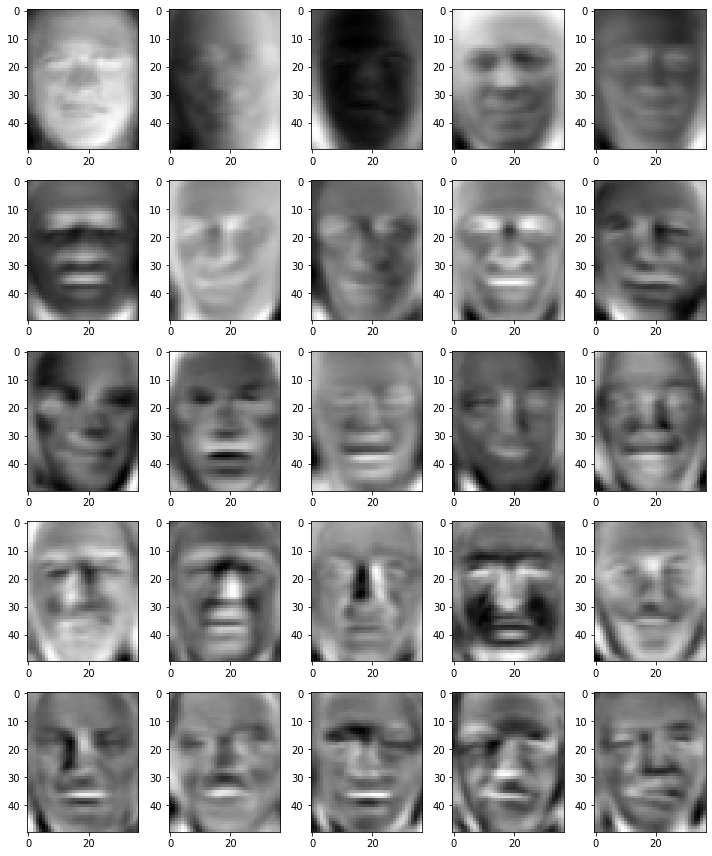

In [31]:
fig, ax = plt.subplots(5, 5, figsize=(10,12))
cnt = 0
for row in range(5):
    for col in range(5):
        ax[row, col].imshow(ls[cnt], cmap='binary',aspect='auto')
        #ax[row,col].plot(ls[cnt])
        ax[row, col].set_axis_on()
        cnt += 1
        
plt.tight_layout()
plt.show()